In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
## DO NOT DELETE ##

def generate_linear_data(n:int, d:int, sigma:float):
  '''
    Input:
      n: number of datapoints
      d: dimension of features
      sigma: std for gaussian noise for the synthetic linear data
    returns 3 variables
      X the design matrix shape is (n x d) each element in the matrix is in [0, 1]
      y the associated labels shape is (n,) each y is in [-1, 1]
      theta is randomly generated on the surface of the sphere,
  '''
  X = np.random.randn(n, d) # entries uniform in [0,1), thus each row ||x_i|| bounded by 1
  theta = np.random.normal(0, 1, d) # d iid Gaussian each entry N(0, 1)
  theta = theta / np.linalg.norm(theta) # theta is uniformly distributed on the surface of unit sphere, shape (d,)
  y = (X @ theta) + np.random.normal(0, sigma, size=n) # so essentially the learner is trying to recover \theta
  return X, y

In [3]:
## DO NOT DELETE ##
def mse_loss(y_true:np.ndarray, y_pred:np.ndarray):
  '''
  Inputs:
    y_true : the ground truth labels vector
    y_pred : the predicted labels vector
  '''
  assert len(y_true) == len(y_pred) # assert that the size is same

  return mean_squared_error(y_true, y_pred) # MSE calculation

Using Gradient Descent for Optimization

In [23]:
def linear_regression_soln(X_train:np.ndarray, y_train:np.ndarray, X_test:np.ndarray, y_test:np.ndarray,) -> np.ndarray:
    '''
     TODO complete this function ;
     Implement linear regression and compute the mse (3 PTS)
     
     Returns:
        mse_loss_linear_reg (float) : the mean squared error on the test set
    '''
    # TODO Implement this function
    m, n = X_train.shape
    weights = np.zeros(n) #shape n * n
    bias = 0
    epochs = 1000
    LR = 0.001
    for i in range(epochs):
        y_pred = np.dot(X_train, weights) + bias
        error = y_pred - y_train
        mse_loss_linear_reg = mse_loss(y_pred, y_train)

        dw = np.dot(X_train.T, error) / m
        db = np.sum(error) / m

        bias = bias - LR * db
        weights = weights - LR * dw
    
    return mse_loss_linear_reg

In [24]:
X, y = generate_linear_data(n = 1000, d = 20, sigma = 0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)
# N_train, N_test = len(X_train), len(X_test)

mse_loss_linear_reg = linear_regression_soln(X_train, y_train, X_test, y_test)
print(mse_loss_linear_reg) # -- Sanity check; this value should be very close to 0, think why!

0.12636982482600467


Solving the Closed Form Solution

In [26]:
def linear_regression_soln(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> float:
    '''
    Implement linear regression using the closed-form solution and compute the MSE.

    Returns:
        mse_loss_linear_reg (float): The mean squared error on the test set.
    '''
    #column of ones for the bias term
    X_train_aug = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test_aug = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    XTX = np.dot(X_train_aug.T, X_train_aug)
    XTy = np.dot(X_train_aug.T, y_train)
    weights = np.linalg.solve(XTX, XTy)
    
    # Compute predictions on the test set
    y_pred = np.dot(X_test_aug, weights)
    
    mse_loss_linear_reg = mse_loss(y_pred, y_test)
    
    return mse_loss_linear_reg

In [20]:
X, y = generate_linear_data(n = 1000, d = 20, sigma = 0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)
# N_train, N_test = len(X_train), len(X_test)

mse_loss_linear_reg = linear_regression_soln(X_train, y_train, X_test, y_test)
print(mse_loss_linear_reg) # -- Sanity check; this value should be very close to 0, think why!

9.285774930365838e-32


As we observe the loss value is very close to 0 and much lesser than what we observed with Gradient Descent in the initial implementation of our linear regression function.

In [34]:
def ridge_regression_soln(X_train:np.ndarray, y_train:np.ndarray, \
                        X_test:np.ndarray, y_test:np.ndarray, \
                        lamb:float) -> np.ndarray:
    '''
     TODO complete this function ;
     Implement ridge regression and compute the mse (3 PTS)

    HINT --- Solve this in three steps

    Step (1) -- Compute the optimal theta vector on the train set (call it `theta_opt`)
    This is a (np.ndarray) of size d (d = number of features.

    Step (2) -- Compute the prediction vector using the above on the test set and return this prediction vector.

    Step (3) -- Compute MSE (see the corresponding function in utils.py file) and return the MSE value

    Returns:
        mse_loss_ridge_reg (float) : the mean squared error on the test set
    '''
    # TODO Implement this function
    d = X_train.shape[1]
    I = np.eye(d)

    XTX_lambI = np.dot(X_train.T,X_train) + lamb * I #the left part of theta_opt

    XTY = np.dot(X_train.T, y_train)

    
    theta_opt = np.linalg.solve(XTX_lambI, XTY) #now we find the optimal theta parameter
    #for ridge regression

    y_pred = np.dot(X_test, theta_opt)

    return mse_loss(y_pred , y_test)

In [35]:
## DO NOT CHANGE THE BELOW LINES !

X, y = generate_linear_data(n = 1000, d = 20, sigma = 0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)
# N_train, N_test = len(X_train), len(X_test)

mse_loss_linear_reg = linear_regression_soln(X_train, y_train, X_test, y_test)
print(mse_loss_linear_reg) # -- Sanity check; this value should be very close to 0, think why!

lambda_list = [0.1, 0.5, 1, 5, 10]
mse_list = []

for lamb in lambda_list:

    mse_loss_ridge_reg = ridge_regression_soln(X_train, y_train, X_test, y_test, lamb)
    mse_list.append(mse_loss_ridge_reg)

print(mse_list)

2.112020517851222e-31
[1.656857202031158e-08, 4.1377154469272294e-07, 1.6528764503650335e-06, 4.0883980078663925e-05, 0.00016138572013719396]


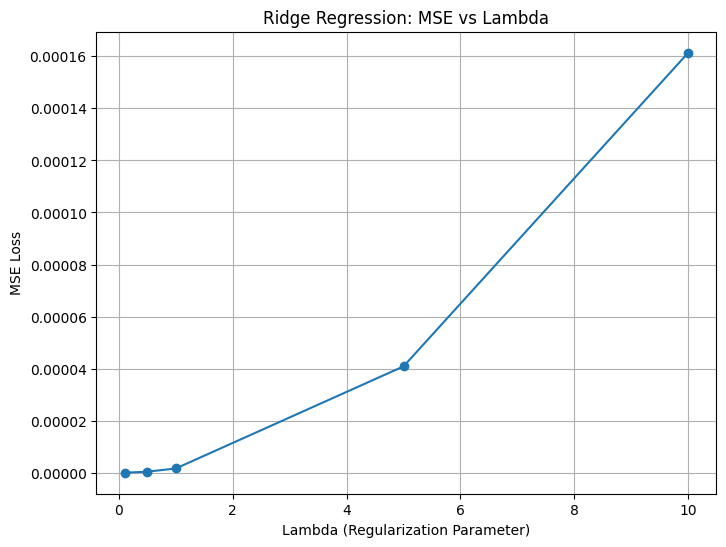

In [38]:
# TODO plot the mse values (`mse_list`) on the y-axis and the lambda values on the x-axis for ridge regression
# use matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(lambda_list, mse_list, marker = 'o')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('MSE Loss')
plt.title("Ridge Regression: MSE vs Lambda")
plt.grid(True)
plt.show()


## Comparison of Both Approaches

### MSE Loss
1. **Linear Regression MSE Loss:** Of the order of 2.11e-31, extremely close to zero.
2. **Ridge Regression MSE Loss:** MSE values range from approximately 1.65e-08 (for \(\lambda = 0.1\)) to 0.000161 (for \(\lambda = 10\)).

### Performance Analysis

1. **Linear Regression:**
   - The nearly zero MSE shows that linear regression achieves an almost perfect fit. This is expected, as the `generate_linear_data` function generates synthetic data that is exactly linear, with points perfectly aligned to a linear relationship. The lack of noise (\(\sigma = 0\)) further ensures that the model can capture the exact relationship, leading to minimal error.
   - **Why Linear Regression Performs Better Here:** Given the perfectly linear nature of the data, linear regression captures the true relationship without the need for regularization. Regularization isn’t necessary in this setup because there’s no overfitting risk when the data is ideal and noise-free.

2. **Ridge Regression:**
   - Ridge regression yields slightly higher MSE values because it introduces a regularization term. This regularization slightly alters the optimal solution, leading to higher MSE compared to linear regression. However, it still performs well on the test set, as the data is linear and well-behaved.
   - **Effect of \(\lambda\):** As \(\lambda\) increases, ridge regression’s regularization effect increases, slightly raising the MSE. This regularization term prevents large weights, making the model more robust in cases where noise or multicollinearity is present. However, in the case of perfectly linear data, this regularization isn’t needed, which is why ridge regression performs slightly worse here.

### Practical Implications

- **When to Prefer Linear Regression:** Ideal for synthetic or real-world scenarios with noise-free, perfectly linear data, as in this setup, where overfitting is not a concern. Linear regression will capture the relationship precisely without the need for regularization.
  
- **When to Use Ridge Regression:** Preferable in practical applications where data often contains noise or multicollinearity. Ridge regression helps prevent overfitting by penalizing large weights, which provides robustness and better generalization on real-world, noisy data. It’s particularly useful in high-dimensional settings, where features may be correlated.

### Conclusion

- **Current Setup:** Linear regression achieves a lower MSE due to the perfectly linear and noise-free nature of the synthetic data generated by `generate_linear_data`. The function produces data that exactly aligns with the linear model’s assumptions, allowing linear regression to reach nearly zero error.
- **Practical Use:** In real-world data, ridge regression is generally preferred because it mitigates overfitting by regularizing the weights. This makes ridge regression more robust and ensures better performance on unseen, noisy data. While linear regression fits perfectly in idealized conditions, ridge regression offers improved stability and generalization for real-world applications.
